In [1]:
import pandas
import matplotlib
import seaborn

%matplotlib inline

In [2]:
FIG_SIZE = (6, 4)

PALETTE = seaborn.color_palette()

matplotlib.rcParams['figure.figsize'] = FIG_SIZE
matplotlib.rcParams['legend.framealpha'] = 1
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

SAVEFIG = True

def _savefig(fig, name):
    import os
    fig.savefig(
        os.path.join('..', 'figures', 'benevolj_{}.pdf'.format(name)),
        bbox_inches='tight'
    )
    
savefig = _savefig if SAVEFIG else lambda x, y: None

In [3]:
df_variants = pandas.read_csv('../data/variants.csv.gz')

In [4]:
df_dependencies = pandas.read_csv('../data/dependencies.csv.gz')

In [5]:
df_dependents = pandas.read_csv('../data/dependents.csv.gz')

In [6]:
df_releases = pandas.read_csv('../data/releases.csv.gz')

In [7]:
df_dependencies = (
    df_dependencies
    .drop_duplicates(['source', 'target'], keep='last')
    [['source', 'target']]
    .groupby('source', sort=False)
    .agg({'target': 'count'})
    .rename_axis('variant')
)

In [8]:
df_dependents = df_dependents.set_index('variant')

In [9]:
df_releases = (
    df_releases
    [['package', 'version']]
    .groupby('package', sort=False)
    .agg({'version': 'count'})
    .rename_axis('variant')
)

In [10]:
df_variants = (
    df_variants
    [['mainline', 'variant']]
    .merge(df_dependencies, how='left', left_on='mainline', right_index=True)
    .merge(df_dependencies, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .merge(df_dependents, how='left', left_on='mainline', right_index=True)
    .merge(df_dependents, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .merge(df_releases, how='left', left_on='mainline', right_index=True)
    .merge(df_releases, how='left', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
    
    .fillna(0)
)

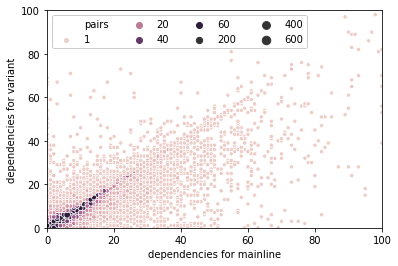

In [11]:
ax = seaborn.scatterplot(
    x='target_mainline',
    y='target_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['target_mainline', 'target_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'pairs'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependencies for mainline',
    xlim=(0, 100),
    ylabel='dependencies for variant',
    ylim=(0, 100),    
)

savefig(ax.figure, 'dependencies')

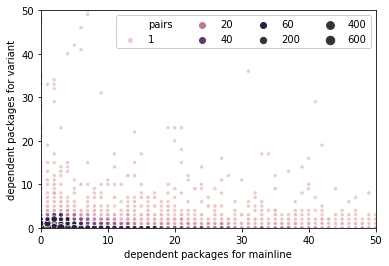

In [12]:
ax = seaborn.scatterplot(
    x='packages_mainline',
    y='packages_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['packages_mainline', 'packages_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'pairs'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for mainline',
    xlim=(0, 50),
    ylabel='dependent packages for variant',
    ylim=(0, 50),
)

savefig(ax.figure, 'dependents')

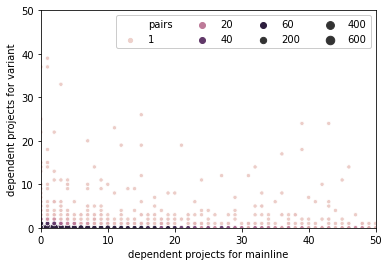

In [13]:
ax = seaborn.scatterplot(
    x='projects_mainline',
    y='projects_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['projects_mainline', 'projects_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'pairs'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent projects for mainline',
    xlim=(0, 50),
    ylabel='dependent projects for variant',
    ylim=(0, 50),
)

savefig(ax.figure, 'projects')

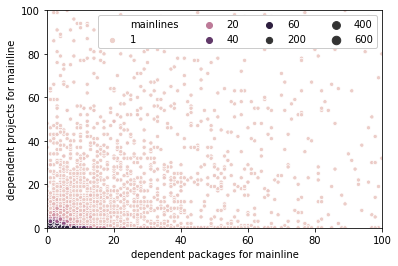

In [14]:
ax = seaborn.scatterplot(
    x='packages_mainline',
    y='projects_mainline',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .drop_duplicates('mainline')
        .groupby(['packages_mainline', 'projects_mainline'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'mainlines'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for mainline',
    xlim=(0, 100),
    ylabel='dependent projects for mainline',
    ylim=(0, 100),
)

savefig(ax.figure, 'dependents_mainline')

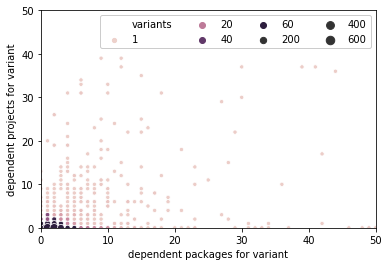

In [15]:
ax = seaborn.scatterplot(
    x='packages_variant',
    y='projects_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .drop_duplicates('variant')
        .groupby(['packages_variant', 'projects_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'variants'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='dependent packages for variant',
    xlim=(0, 50),
    ylabel='dependent projects for variant',
    ylim=(0, 50),
)

savefig(ax.figure, 'dependents_variant')

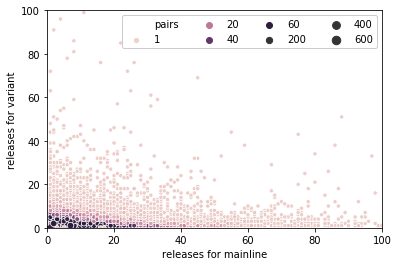

In [16]:
ax = seaborn.scatterplot(
    x='version_mainline',
    y='version_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['version_mainline', 'version_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    ),
)

# Fix invalid "0" label in legend
handles, labels = ax.get_legend_handles_labels()
labels[0] = 'pairs'
labels[1] = '1'
ax.legend(handles, labels, ncol=4)

ax.set(
    xlabel='releases for mainline',
    xlim=(0, 100),
    ylabel='releases for variant',
    ylim=(0, 100),
)

savefig(ax.figure, 'releases')

### Examples

In [17]:
# Variants more actively maintained

(
    df_variants
    .query('version_variant > version_mainline')
    [['mainline', 'variant', 'version_mainline', 'version_variant']]
    .eval('difference = version_variant - version_mainline')
    .sort_values('difference', ascending=False)
    .head(20)
)

,mainline,variant,version_mainline,version_variant,difference
155,spt,fis,6.0,341.0,335.0
8511,zljtest1,mk-command,2.0,192.0,190.0
6439,zhugeview-test,zhugeview,11.0,171.0,160.0
4010,weex-pack,weexpack,1.0,129.0,128.0
7729,restyped-giphy-api,restyped-staffjoy-api,1.0,116.0,115.0
7200,redux-clerk,redux-clerk2,17.0,121.0,104.0
535,greenlight,asyncblock,2.0,105.0,103.0
3160,cogs-javascript-sdk,cogs-sdk,5.0,104.0,99.0
6621,homebridge-bmw-i-remote,homebridge-bmw-connected,4.0,96.0,92.0
9775,vue-cli-plugin-clm-helper,vue-cli-plugin-clm-builder,45.0,134.0,89.0


In [18]:
# Variants having more dependent packages

(
    df_variants
    .query('packages_variant > packages_mainline')
    [['mainline', 'variant', 'packages_mainline', 'packages_variant']]
    .eval('difference = packages_variant - packages_mainline')
    .sort_values('difference', ascending=False)
    .head(20)
)

,mainline,variant,packages_mainline,packages_variant,difference
1170,selenium,selenium-server,97,2046,1949
1027,replace2,replace,0,1043,1043
779,grunt-mocha-screenshot,grunt-mocha,2,651,649
217,mocha-istanbul,grunt-mocha-istanbul,606,987,381
1086,ps,ps-node,3,189,186
155,spt,fis,0,186,186
534,lock-lock,async-lock,0,151,151
359,koa-proxy-b,koa-proxy,1,129,128
5493,fast-html-parser,node-html-parser,39,157,118
1481,grunt-stencil,zetzer,3,105,102


In [19]:
# Variants having more dependent projects

(
    df_variants
    .query('projects_variant > projects_mainline')
    [['mainline', 'variant', 'projects_mainline', 'projects_variant']]
    .eval('difference = projects_variant - projects_mainline')
    .sort_values('difference', ascending=False)
    .head(20)
)

,mainline,variant,projects_mainline,projects_variant,difference
779,grunt-mocha-screenshot,grunt-mocha,1,5069,5068
217,mocha-istanbul,grunt-mocha-istanbul,461,1880,1419
1170,selenium,selenium-server,30,1003,973
1027,replace2,replace,0,909,909
20,backo,backo2,18,913,895
554,artsy-error-handler,benv,6,704,698
265,has-binary-data,has-binary,498,1069,571
359,koa-proxy-b,koa-proxy,0,375,375
123,eclint,editorconfig-tools,69,221,152
1856,jquery.sparkline,jquery-sparkline,0,101,101


In [20]:
df_dependencies_full = pandas.read_csv('../data/dependencies.csv.gz')

In [21]:
# Dependent packages that migrated from the mainline to the variant

temp = (
    df_dependencies_full
    # Is the target a mainline?
    .assign(target_mainline=lambda d: d['target'].isin(df_variants['mainline']))
    # Is the target a variant? If so, get it's mainline
    .merge(
        df_variants[['mainline', 'variant']],
        how='left',
        left_on='target',
        right_on='variant'
    )
    .drop(columns=['variant'])
)

How to read next dataframe?

A dependent package `source` depended on the mainline package `target_M`. The last version of `source` with this dependency is `version_M`.
The same dependent package `source` also dependend on the `target_V` package, which is a variant of the mainline package `target_M`.
This dependency was first observed in `version_V`. 

In [22]:
(
    temp
    .query('target_mainline')
    .drop_duplicates(['source', 'target_mainline'], keep='last')
    .merge(
        (
            temp
            .query('not target_mainline')
            .dropna(subset=['mainline'])
            .drop_duplicates(['source', 'mainline'], keep='first')
        ),
        how='inner',
        left_on=['source', 'target'],
        right_on=['source', 'mainline'],
        suffixes=('_M', '_V'),
    )
    [['source', 'version_M', 'target_M', 'version_V', 'target_V']]
    .query('version_M < version_V')
    .head(20)
)

,source,version_M,target_M,version_V,target_V
0,amd-config-builder,0.2.2,findit,0.2.3,findit2
1,arest,0.2.4,svd-xbee,0.2.5,xbee-arest
5,component-ajax,0.0.1,component-type,0.0.2,type-of
6,connect-static,1.2.3,findit,1.3.0,findit2
11,dbusfs,0.0.2,fuse4js,0.0.3,fuse4js-readlink
12,detective,5.0.1,acorn5-object-spread,5.0.2,@browserify/acorn5-object-spread
19,generator-rhythm,1.0.0,gift,1.0.1,rhythm.gift
20,gitwar,0.1.3,gift,0.1.4,regift
27,hubot-wolfram,1.0.9,wolfram,1.1.0,node-wolfram-api
29,idlx,0.0.10,xregexp,0.0.5,xregexp3


In [25]:
# Variants with more (or less) dependencies

(
    df_variants
    .eval('difference = target_mainline - target_variant')
    .sort_values('difference')
    [['mainline', 'variant', 'target_mainline', 'target_variant', 'difference']]
    
)

,mainline,variant,target_mainline,target_variant,difference
11443,spy-on-render,@scott-m-sarsfield/spy-on-render,27.0,605.0,-578.0
7255,css-module-npm-boilerplate-webpack,didi-ui,7.0,316.0,-309.0
7969,streaming-fusion-cli,@gerv/fusion-cli,13.0,103.0,-90.0
11810,vue-cli-plugin-kanban,vue-kanban-mao,0.0,69.0,-69.0
7825,super-graphiql-express,super-graphiql,0.0,67.0,-67.0
...,...,...,...,...,...
7099,terriajs,geo3d_terriajs,207.0,100.0,107.0
7406,quasar-cli,carbono-cli,157.0,20.0,137.0
4774,fauxton,pouchdb-fauxton,142.0,1.0,141.0
5010,inspect-x,@glenjamin/inspect-x,167.0,1.0,166.0
